# EV-Strat: Executive Strategic Dashboard
**Project:** Unsupervised Learning for EV Market Intelligence in India

This notebook provides a visual deep-dive into the clustering results generated by the `EV-Strat` pipeline. It focuses on the statistical properties of the identified segments.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Plotting Style
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Load Data
We load the processed dataset and the cluster labels generated by the K-Means algorithm.


In [2]:
# Load Data
df_final = pd.read_csv('../data/processed/ev_market_final.csv')
df_clusters = pd.read_csv('../outputs/ev_market_clusters.csv')

# Merge Cluster IDs into the main dataframe
df = pd.merge(df_final, df_clusters[['State', 'District', 'Cluster_ID']], on=['State', 'District'])
print(f'Loaded Data for {len(df)} Districts across {df["State"].nunique()} States.')
df.head()


Loaded Data for 640 Districts across 35 States.


,State,District,Population,Literate,Total_EV_Sales,Station_Count,Cluster_ID
0,Jammu And Kashmir,Kupwara,-0.662017,-0.705721,-0.817714,-0.843654,2
1,Jammu And Kashmir,Badgam,-0.737581,-0.803127,-0.817714,-0.843654,2
2,Jammu And Kashmir,Leh(Ladakh),-1.139518,-1.029659,-0.817714,-0.843654,2
3,Jammu And Kashmir,Kargil,-1.134778,-1.036715,-0.817714,-0.843654,2
4,Jammu And Kashmir,Punch,-0.917023,-0.872361,-0.817714,-0.843654,2


## 2. Feature Correlation Analysis
Before clustering, it is crucial to understand feature redundancy. High correlation between 'Literacy' and 'EV Sales' might indicate that education drives adoption.


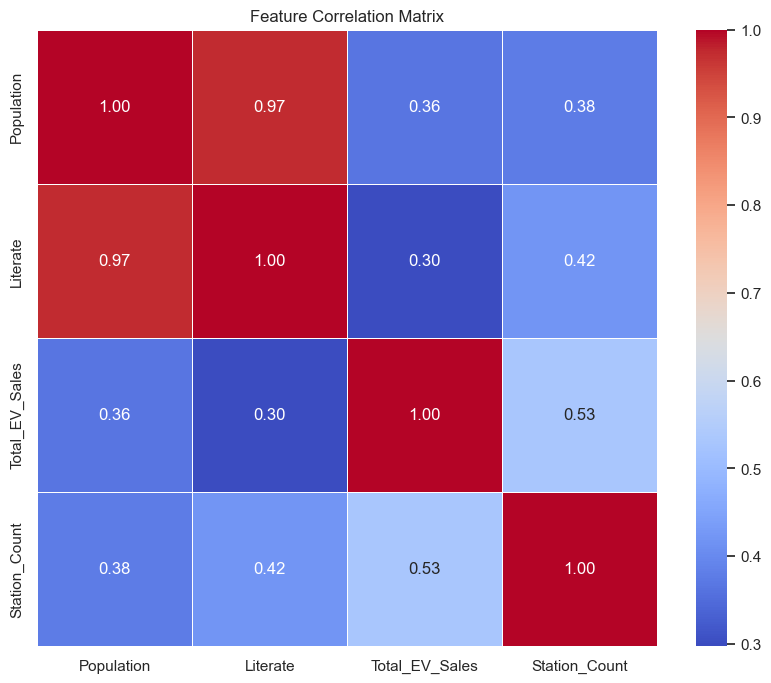

In [3]:
plt.figure(figsize=(10, 8))
corr = df[['Population', 'Literate', 'Total_EV_Sales', 'Station_Count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


## 3. Cluster Profiling (Boxplots)
How do the personas differ? We use boxplots to visualize the distribution of key metrics across the 5 clusters.
**Key Insight:** Look for the cluster with high outliers in 'EV Sales' (The Leaders) vs. the cluster with high 'Literacy' but low 'Sales' (The Opportunity).


/var/folders/fb/3308pyvn1558d6y6rn0bw5sm0000gn/T/ipykernel_5700/3117061104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_ID', y='Total_EV_Sales', ax=axes[0], palette='viridis')
/var/folders/fb/3308pyvn1558d6y6rn0bw5sm0000gn/T/ipykernel_5700/3117061104.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_ID', y='Literate', ax=axes[1], palette='magma')
/var/folders/fb/3308pyvn1558d6y6rn0bw5sm0000gn/T/ipykernel_5700/3117061104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_I

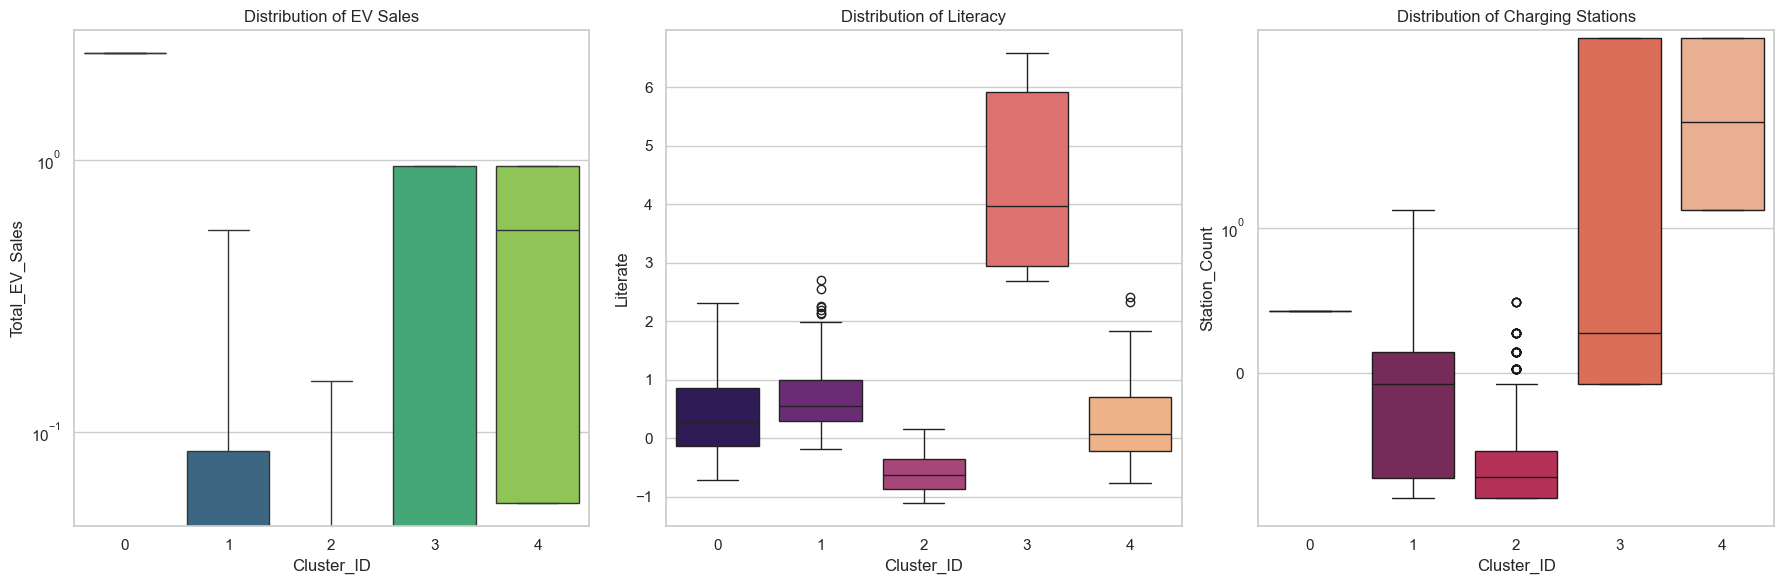

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: EV Sales by Cluster
sns.boxplot(data=df, x='Cluster_ID', y='Total_EV_Sales', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of EV Sales')
axes[0].set_yscale('log') # Log scale to handle outliers

# Plot 2: Literacy by Cluster
sns.boxplot(data=df, x='Cluster_ID', y='Literate', ax=axes[1], palette='magma')
axes[1].set_title('Distribution of Literacy')

# Plot 3: Station Count by Cluster
sns.boxplot(data=df, x='Cluster_ID', y='Station_Count', ax=axes[2], palette='rocket')
axes[2].set_title('Distribution of Charging Stations')
axes[2].set_yscale('symlog')

plt.tight_layout()
plt.show()


## 4. PCA Projection
Visualizing the 5-dimensional data in 2D space using the Principal Components calculated in Phase 3.


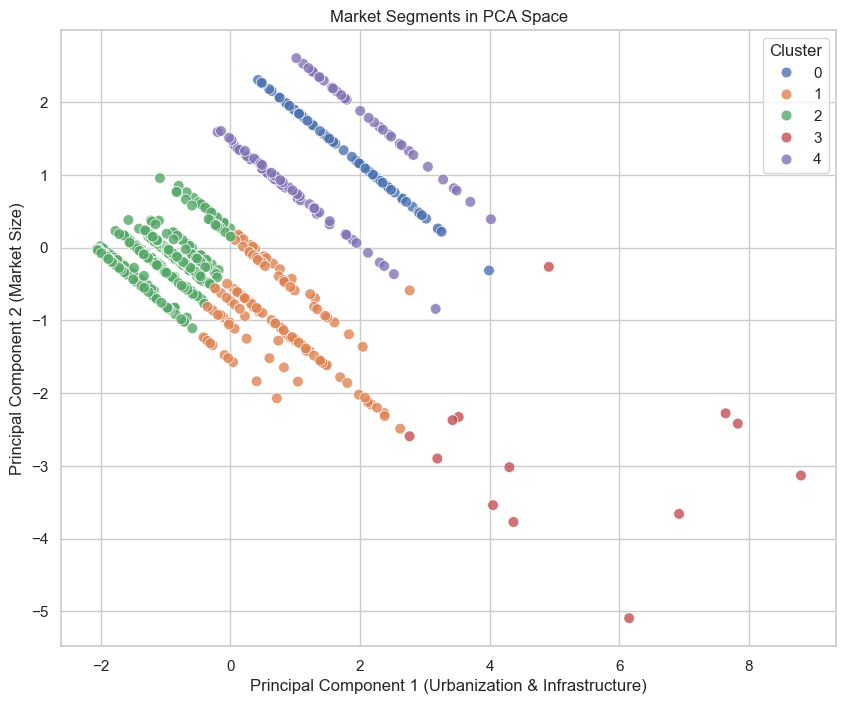

In [5]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clusters, x='PC1', y='PC2', hue='Cluster_ID', palette='deep', s=60, alpha=0.8)
plt.title('Market Segments in PCA Space')
plt.xlabel('Principal Component 1 (Urbanization & Infrastructure)')
plt.ylabel('Principal Component 2 (Market Size)')
plt.legend(title='Cluster')
plt.show()


## 5. Strategic Conclusion
Based on the boxplots above, we can identify:
- **The Leader:** The Cluster with the highest median EV Sales.
- **The Opportunity:** The Cluster with high Literacy but low Sales/Stations.
- **The Laggard:** The Cluster with low performance across all metrics.
